In [1]:
import pandas as pd
import numpy as np
import dexplot as dxp
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [2]:
df = pd.read_csv('StudentRating.csv')

In [3]:
#Data has 8 columns and 851 rows
df.shape

(859, 8)

In [4]:
print(df.head())

  Grade  SES  504 Sped Race V_I  Rating  \
0   9th  NaN  NaN  NaN    W  IP     1.0   
1   9th  NaN  NaN  NaN    W  IP     1.0   
2   9th  NaN  NaN    Y    W  IP     1.0   
3  10th  NaN  NaN    Y    W  IP     1.0   
4  10th  NaN  NaN    Y    W  IP     1.0   

                                             Comment  
0  When we are talking to our peers they always i...  
1  there are maybe two aduts that are not over th...  
2  They don't understand what most of us are goin...  
3                                             lonely  
4  its terrible we walk in to __________ to this ...  


In [5]:
# filled in the na columns
# Dropped rows with no rating. These rows aslo had no comments so are not useful.

df['SES']=df['SES'].fillna('Full')
df['504']=df['504'].fillna('No')
df['Sped']=df['Sped'].fillna('No')
df['Race']=df['Race'].fillna('Unknown')
df['V_I']= df['V_I'].fillna('Unknown')
df['Comment']= df['Comment'].fillna('NoComment')


df = df[df['Rating'].notna()]

In [6]:
#Change grade to an integer so that 9-12 are recognized as increasing in order.  9, 10, 11, 12th grade

df['Grade'] = df['Grade'].replace({'9th': 9, '10th' : 10, '11th': 11, '12th':12})

df['SES'] = df['SES'].replace('Red','Reduced')
df['504']= df['504'].replace('Y', 'Yes')
df['Sped']= df['Sped'].replace('Y', 'Yes')
df['V_I']= df['V_I'].replace({'V': 'Virtual', 'IP':"In Person"})
df['Race']= df['Race'].replace({'5 - Native Hawaiian or Other Pacific Islander': "Hawaii/Islander"})
df['Race']= df['Race'].replace({'2 - American Indian or Alaska Native': "AmIndian/Alaska"})

In [7]:
indexNames = df[(df['Race']== 'Hawaii/Islander') | (df['Race']== 'Unknown') | (df['Race']== 'AmIndian/Alaska')].index
df.drop(indexNames, inplace=True)

In [8]:
df.head()

,Grade,SES,504,Sped,Race,V_I,Rating,Comment
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...
3,10,Full,No,Yes,W,In Person,1.0,lonely
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...


In [9]:
df['Word_Count'] = df['Comment'].str.split().str.len()

df['Word_Count']= df['Word_Count'].fillna(0)
df.head(5)

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...,28
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...,17
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...,10
3,10,Full,No,Yes,W,In Person,1.0,lonely,1
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...,72


In [10]:
df.loc[df['Comment']=='NoComment', 'Word_Count']= 0

In [11]:
df.head(15)

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...,28
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...,17
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...,10
3,10,Full,No,Yes,W,In Person,1.0,lonely,1
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...,72
5,10,Reduced,No,No,W,In Person,2.0,no,1
6,9,Free,No,No,W,In Person,2.0,There are many teachers that give lots of work...,57
7,10,Free,No,No,W,In Person,2.0,everybody is just dull like they don't want to...,10
8,10,Free,No,No,W,In Person,2.0,i dont feel like they give enough thought into...,14
9,9,Full,No,No,W,In Person,2.0,They are nice but I dont talk to them that much.,11


In [12]:
df['Word_Count'].mean()

10.565113500597372

In [13]:
Grade_WordCount=df.groupby('Grade')['Word_Count'].mean().to_frame()
Grade_WordCount

,Word_Count
Grade,
9,9.068000
10,10.974227
11,12.490119
12,9.192857


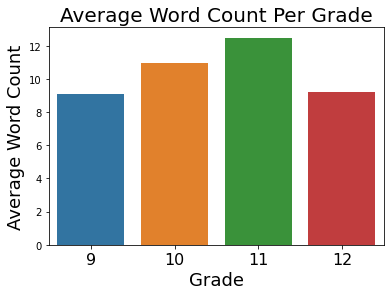

In [14]:
sns.barplot(x='Grade', y='Word_Count', data=Grade_WordCount.reset_index())
plt.title("Average Word Count Per Grade", fontsize=20)
plt.xticks(fontsize=16)
plt.xlabel("Grade",fontsize=18)
plt.ylabel("Average Word Count", fontsize=18)
plt.show()

In [15]:
Race_WordCount =df.groupby('Race')['Word_Count'].mean().sort_values().to_frame()
Race_WordCount

,Word_Count
Race,
B/AA,9.203704
2+,9.250000
H/L,10.349359
W,10.980149
As,12.400000


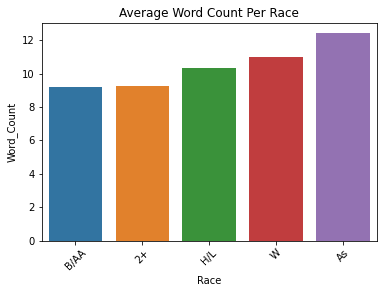

In [16]:
sns.barplot(x='Race', y='Word_Count', data=Race_WordCount.reset_index())
plt.title("Average Word Count Per Race")
plt.xticks(rotation = 45)
plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


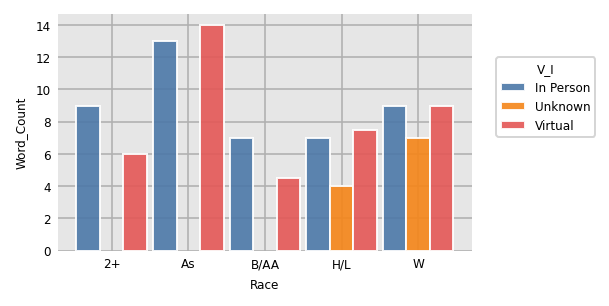

In [17]:
dxp.bar(x='Race', y = 'Word_Count', data=df, aggfunc='median', split='V_I')
#plt.title("Median Word Count by Race")

#plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


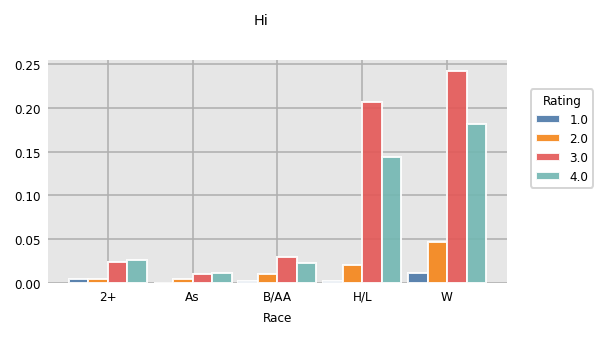

In [18]:
dxp.count(val='Race', data=df, split='Rating',normalize=True, title='Hi')

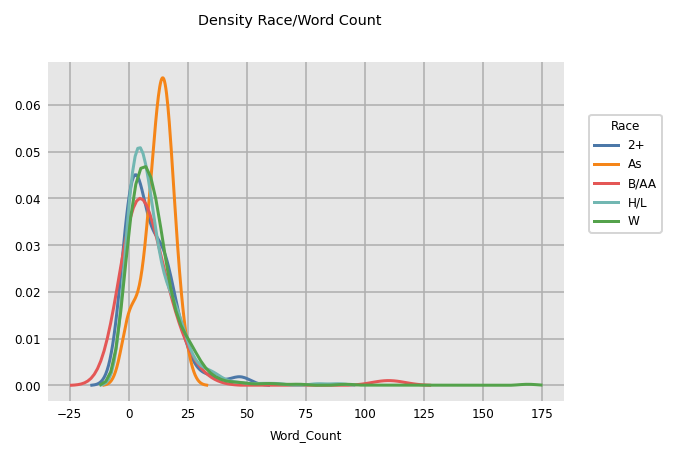

In [19]:
dxp.kde(x='Word_Count', data=df, split='Race', title='Density Race/Word Count')

In [20]:
Rating_WordCount = df.groupby('Rating')['Word_Count'].mean().to_frame()
Rating_WordCount

,Word_Count
Rating,
1.0,14.625000
2.0,17.014286
3.0,10.522145
4.0,9.018634


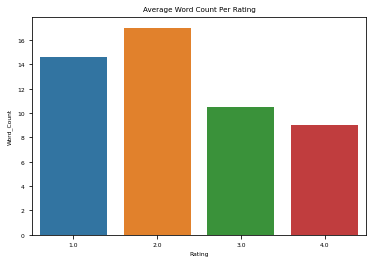

In [21]:
sns.barplot(x='Rating', y='Word_Count', data=Rating_WordCount.reset_index())
plt.title("Average Word Count Per Rating")
plt.show()

In [22]:
V_I_WordCount=df.groupby('V_I')['Word_Count'].mean().to_frame()
V_I_WordCount

,Word_Count
V_I,
In Person,10.395706
Unknown,5.750000
Virtual,10.712032


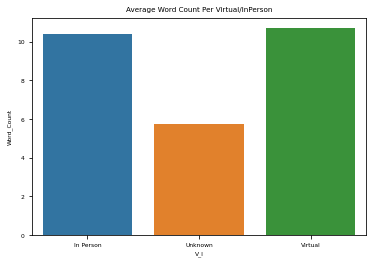

In [23]:
sns.barplot(x='V_I', y='Word_Count', data=V_I_WordCount.reset_index())
plt.title("Average Word Count Per Virtual/InPerson")
plt.show()

In [24]:
No_Comment = df[(df.Comment == 'NoComment')]
No_Comment

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count
10,9,Full,No,No,W,In Person,2.0,NoComment,0
22,11,Free,No,Yes,W,In Person,2.0,NoComment,0
30,9,Free,No,No,W,In Person,3.0,NoComment,0
32,10,Free,No,No,W,In Person,3.0,NoComment,0
54,9,Full,No,No,W,In Person,3.0,NoComment,0
...,...,...,...,...,...,...,...,...,...
825,11,Full,No,No,2+,Virtual,3.0,NoComment,0
827,12,Full,Yes,No,2+,Virtual,3.0,NoComment,0
828,12,Full,Yes,No,2+,Virtual,3.0,NoComment,0
830,9,Full,No,No,2+,Virtual,4.0,NoComment,0


In [25]:
NoComment_Grade = No_Comment.groupby('Grade')['Comment'].count().to_frame()
NoComment_Grade

,Comment
Grade,
9,33
10,25
11,35
12,32


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


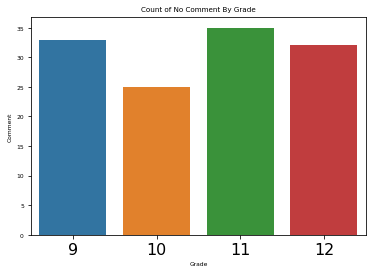

In [26]:
sns.barplot(x='Grade', y='Comment', data=NoComment_Grade.reset_index())
plt.title("Count of No Comment By Grade")
plt.xticks(fontsize=16)
plt.show()

<AxesSubplot:xlabel='Grade', ylabel='Comment'>

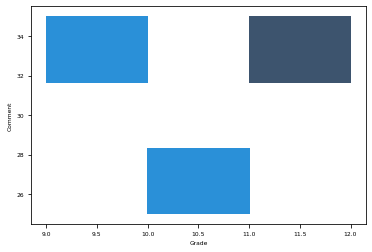

In [27]:
sns.histplot(x='Grade', y='Comment', data=NoComment_Grade.reset_index())

In [28]:
NoComment_Race = No_Comment.groupby('Race')['Comment'].count().to_frame()
NoComment_Race

,Comment
Race,
2+,11
As,2
B/AA,13
H/L,42
W,57


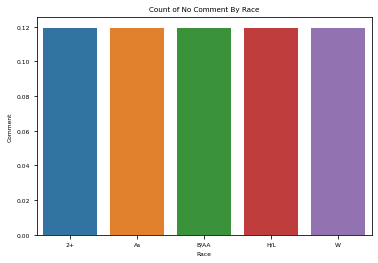

In [29]:
sns.barplot(x='Race', y='Comment', data=NoComment_Race.reset_index(),estimator = lambda x: len(x)/len(df)*100 )
plt.title("Count of No Comment By Race")
plt.show()

In [30]:
NoComment_Rating = No_Comment.groupby('Rating')['Comment'].count().to_frame()
NoComment_Rating

,Comment
Rating,
1.0,3
2.0,6
3.0,73
4.0,43


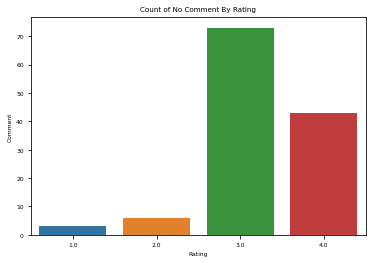

In [31]:
sns.barplot(x='Rating', y='Comment', data=NoComment_Rating.reset_index())
plt.title("Count of No Comment By Rating")
plt.show()

In [32]:
indexNames = df[(df['Race']== 'Hawaii/Islander') | (df['Race']== 'Unknown') | (df['Race']== 'AmIndian/Alaska')].index
df.drop(indexNames, inplace=True)


In [33]:
df.shape

(837, 9)

In [34]:
df.isna().sum()

Grade         0
SES           0
504           0
Sped          0
Race          0
V_I           0
Rating        0
Comment       0
Word_Count    0
dtype: int64

In [35]:
#Data no comments

df_no_comment= df.drop(['Comment'], axis=1)
df_no_comment.head()

,Grade,SES,504,Sped,Race,V_I,Rating,Word_Count
0,9,Full,No,No,W,In Person,1.0,28
1,9,Full,No,No,W,In Person,1.0,17
2,9,Full,No,Yes,W,In Person,1.0,10
3,10,Full,No,Yes,W,In Person,1.0,1
4,10,Full,No,Yes,W,In Person,1.0,72


In [36]:
df_no_comment.dtypes

Grade           int64
SES            object
504            object
Sped           object
Race           object
V_I            object
Rating        float64
Word_Count      int64
dtype: object

In [37]:
df_no_comment['Grade'].value_counts().sort_index(ascending=True).to_frame()

,Grade
9,250
10,194
11,253
12,140


In [38]:
df_no_comment['SES'].value_counts(ascending=True).to_frame()

,SES
Reduced,40
Free,172
Full,625


In [39]:
df_no_comment['504'].value_counts(ascending=True).to_frame()

,504
Yes,116
No,721


In [40]:
df_no_comment['Sped'].value_counts(ascending=True).to_frame()

,Sped
Yes,89
No,748


In [41]:
df_no_comment['Race'].value_counts(ascending=True).to_frame()

,Race
As,20
2+,48
B/AA,54
H/L,312
W,403


In [42]:
df_no_comment['V_I'].value_counts(ascending=True).to_frame()

,V_I
Unknown,4
In Person,326
Virtual,507


In [43]:
df_no_comment['Rating'].value_counts(ascending=True).to_frame()

,Rating
1.0,16
2.0,70
4.0,322
3.0,429


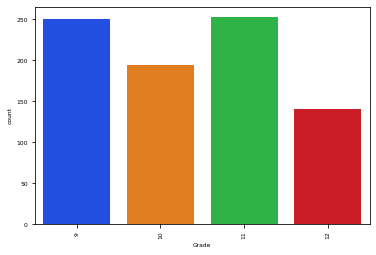

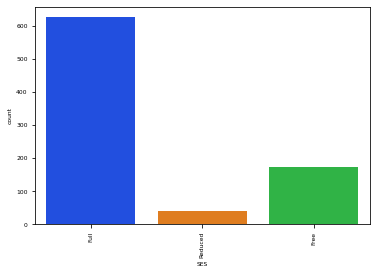

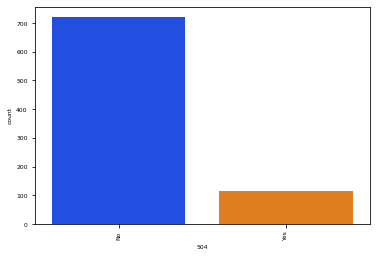

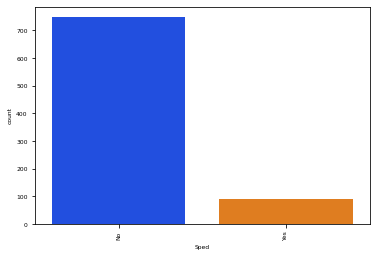

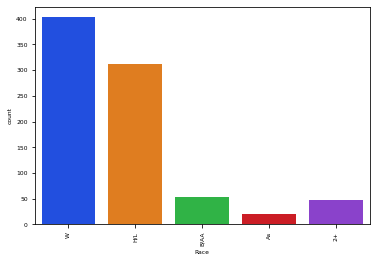

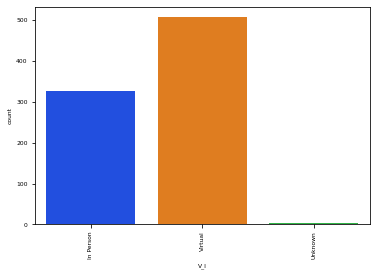

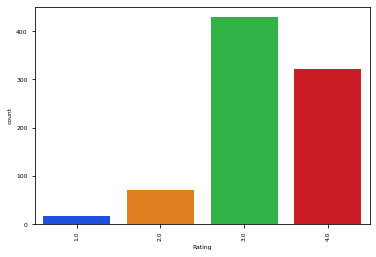

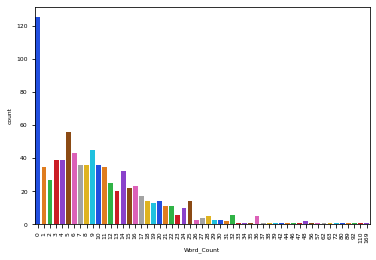

In [44]:
for column in df_no_comment:
    sns.countplot(x=column,data=df, palette='bright')
    plt.xticks(rotation=90)
    plt.show()

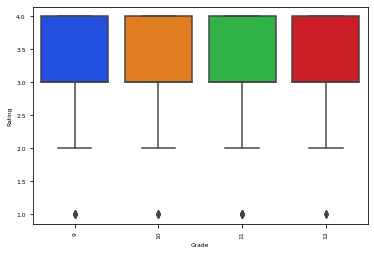

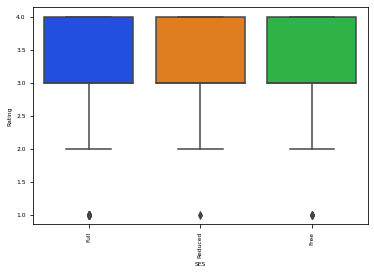

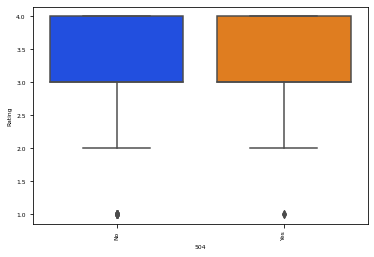

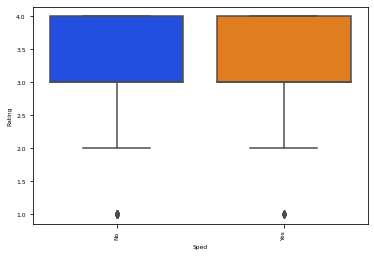

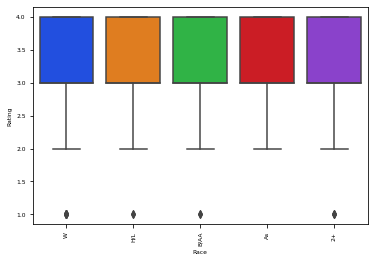

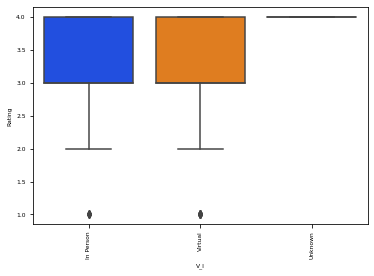

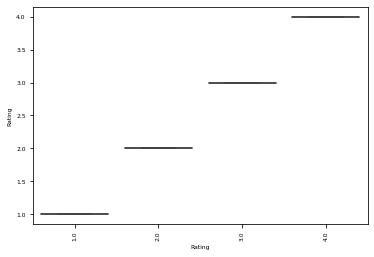

In [45]:
for column in df_no_comment.drop(['Word_Count'], axis=1):
    sns.boxplot(x=column, y= 'Rating', data=df_no_comment,palette='bright')
    plt.xticks(rotation=90)
    plt.show()

In [46]:
# Create Grades DataFrame
df_9 = df[df['Grade']==9]
df_10 = df[df['Grade']==10]
df_11 = df[df['Grade']==11]
df_12 = df[df['Grade']==12]

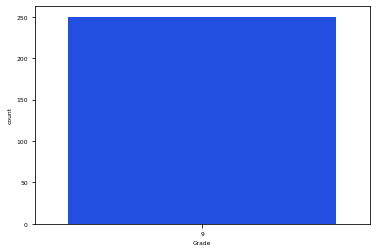

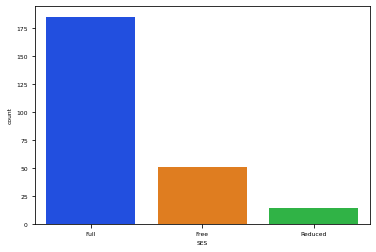

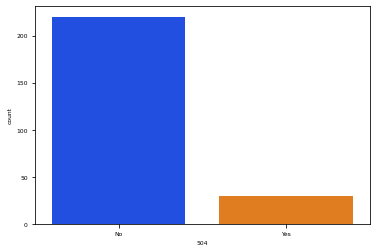

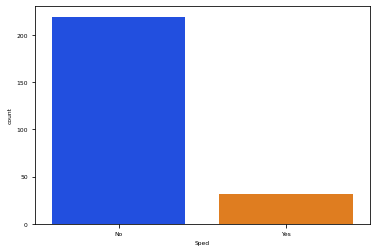

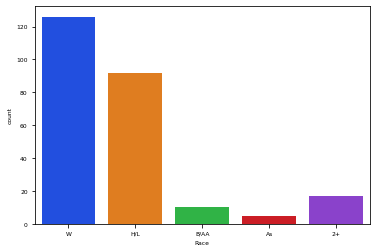

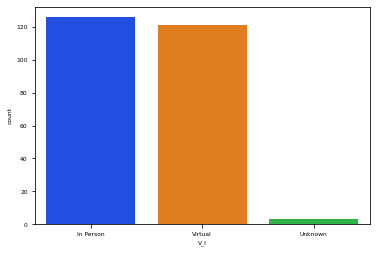

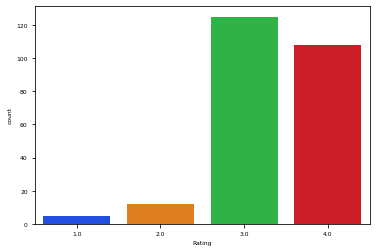

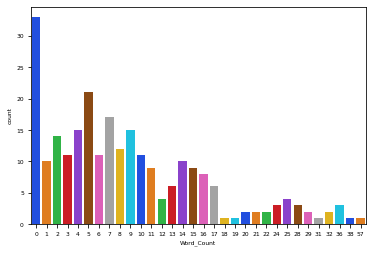

In [47]:
for column in df_9.drop(['Comment'], axis=1):
    sns.countplot(x=column,data=df_9, palette='bright')
    plt.show()

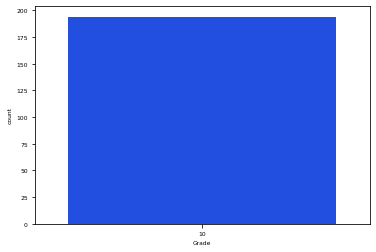

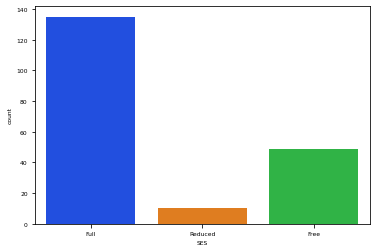

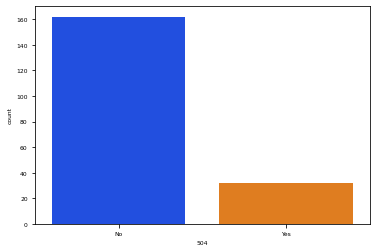

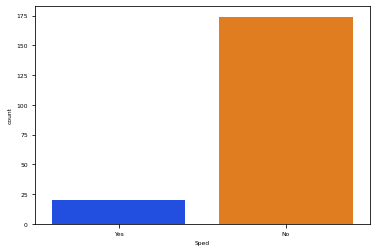

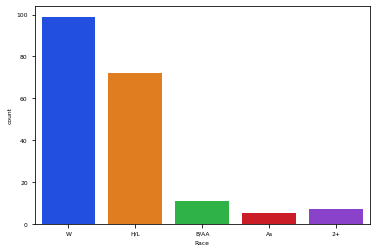

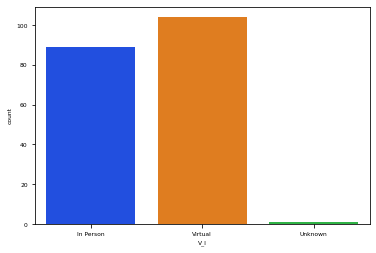

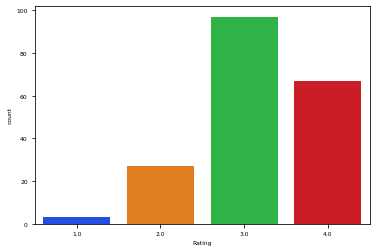

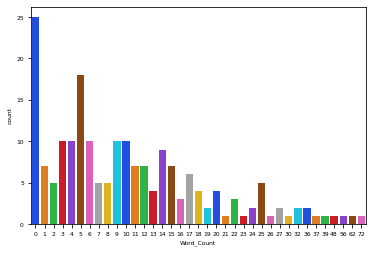

In [48]:
for column in df_10.drop(['Comment'], axis=1):
    sns.countplot(x=column,data=df_10,palette='bright')
    plt.show()

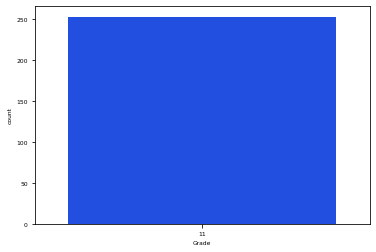

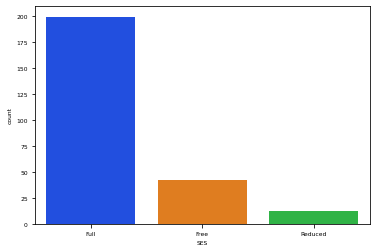

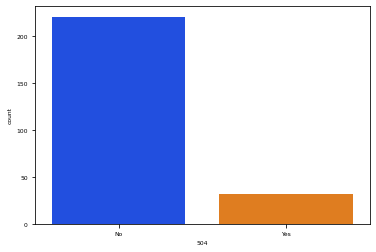

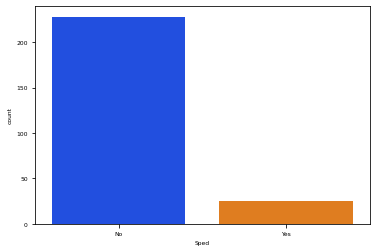

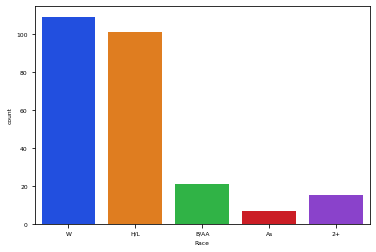

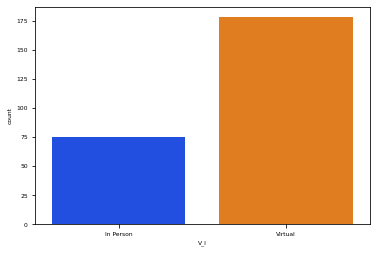

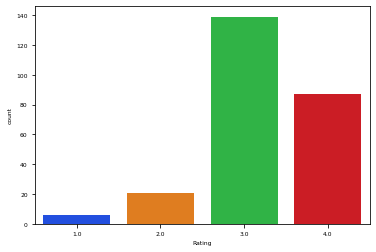

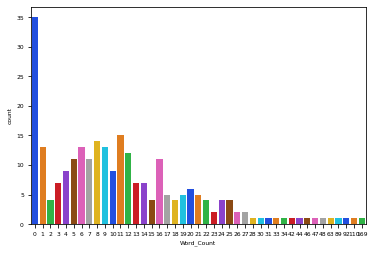

In [49]:
for column in df_11.drop(['Comment'], axis=1):
    sns.countplot(x=column,data=df_11, palette='bright')
    plt.show()

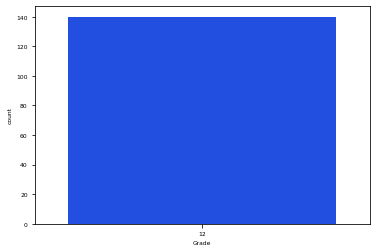

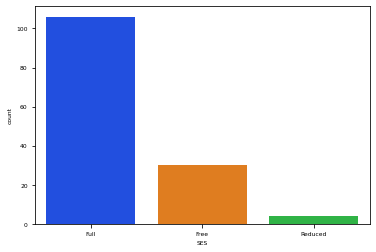

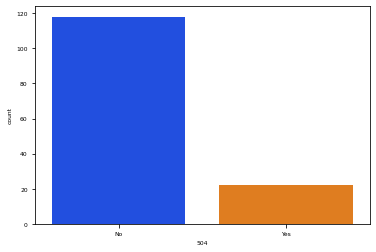

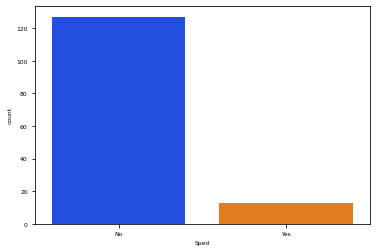

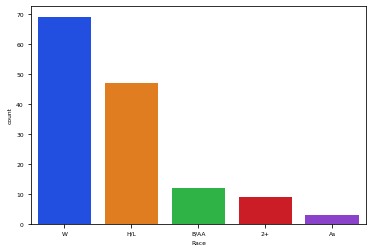

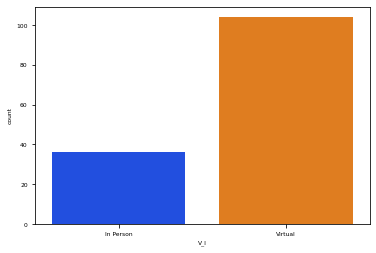

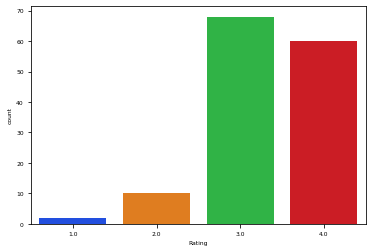

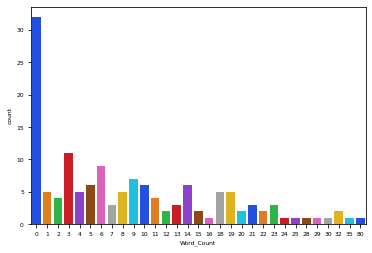

In [50]:
for column in df_12.drop(['Comment'], axis=1):
    sns.countplot(x=column,data=df_12, palette='bright')
    plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


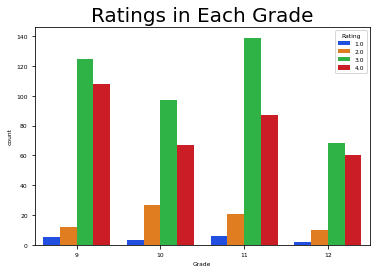

In [51]:
sns.countplot(x='Grade', hue="Rating", data=df, palette='bright')
plt.title("Ratings in Each Grade", fontsize = 20)
plt.show()

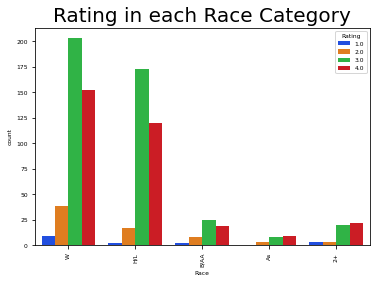

In [52]:
sns.countplot(x='Race', hue="Rating", data=df, palette='bright')
plt.xticks(rotation = 90)
plt.title('Rating in each Race Category', fontsize=20)
plt.show()

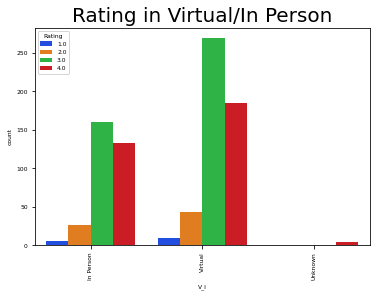

In [53]:
sns.countplot(x='V_I', hue="Rating", data=df, palette='bright')
plt.title('Rating in Virtual/In Person', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

In [54]:
df.groupby(['Race', 'Rating'])['Rating'].count().sort_index().to_frame()

Rating
Race Rating        
2+   1.0          3
     2.0          3
     3.0         20
     4.0         22
As   2.0          3
     3.0          8
     4.0          9
B/AA 1.0          2
     2.0          8
     3.0         25
     4.0         19
H/L  1.0          2
     2.0         17
     3.0        173
     4.0        120
W    1.0          9
     2.0         39
     3.0        203
     4.0        152

In [55]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [56]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Sherri's
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sherri's
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sherri's
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
#This removes the punctuation 
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

In [58]:
print(df['Comment'].iloc[0])
a=(form_sentence(df['Comment'].iloc[0]))
print(a)

When we are talking to our peers they always interrupt us, and say "you can talk out side of school" even though some of us don't have phones.
When we are talking to our peers they always interrupt us and say you can talk out side of school even though some of us do n't have phones


In [59]:
#This removes the stopwords from text
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [60]:
b=(no_user_alpha(a))
print(b)

['talking', 'peers', 'always', 'interrupt', 'us', 'say', 'talk', 'side', 'school', 'even', 'though', 'us', 'phones']


In [61]:
#This normalizes the word  takes away suffexes etc
def normalization(tweet_list):
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in tweet_list:
              normalized_text = lem.lemmatize(word,'v')
              normalized_tweet.append(normalized_text)
    return normalized_tweet

In [62]:
c=normalization(b)
print(c)

['talk', 'peer', 'always', 'interrupt', 'us', 'say', 'talk', 'side', 'school', 'even', 'though', 'us', 'phone']


In [63]:
no_punctuation = []
for comment in df['Comment']:
    a=form_sentence(comment)
   
    no_punctuation.append(a)
   
df['No_Punt'] = no_punctuation 

In [64]:
df.head()

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count,No_Punt
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...,28,When we are talking to our peers they always i...
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...,17,there are maybe two aduts that are not over th...
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...,10,They do n't understand what most of us are goi...
3,10,Full,No,Yes,W,In Person,1.0,lonely,1,lonely
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...,72,its terrible we walk in to to this teacher try...


In [65]:
No_stop = []
for comment in df['No_Punt']:
    b=no_user_alpha(comment)
    No_stop.append(b)
df['No_Stop']= No_stop

In [66]:
df.head()

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count,No_Punt,No_Stop
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...,28,When we are talking to our peers they always i...,"[talking, peers, always, interrupt, us, say, t..."
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...,17,there are maybe two aduts that are not over th...,"[maybe, two, aduts, top, hipocritical, everyth..."
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...,10,They do n't understand what most of us are goi...,"[understand, us, going, though]"
3,10,Full,No,Yes,W,In Person,1.0,lonely,1,lonely,[lonely]
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...,72,its terrible we walk in to to this teacher try...,"[terrible, walk, teacher, trying, shove, polit..."


In [67]:
Normal = []
for comment in df['No_Stop']:
    c=normalization(comment)
    Normal.append(c)
df['Final_Comment'] = Normal

In [68]:
df.head()

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count,No_Punt,No_Stop,Final_Comment
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...,28,When we are talking to our peers they always i...,"[talking, peers, always, interrupt, us, say, t...","[talk, peer, always, interrupt, us, say, talk,..."
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...,17,there are maybe two aduts that are not over th...,"[maybe, two, aduts, top, hipocritical, everyth...","[maybe, two, aduts, top, hipocritical, everyth..."
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...,10,They do n't understand what most of us are goi...,"[understand, us, going, though]","[understand, us, go, though]"
3,10,Full,No,Yes,W,In Person,1.0,lonely,1,lonely,[lonely],[lonely]
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...,72,its terrible we walk in to to this teacher try...,"[terrible, walk, teacher, trying, shove, polit...","[terrible, walk, teacher, try, shove, politica..."


In [69]:
#Separate the comments by Grade
Comments_9 = df[df['Grade']==9]
Comments_10 = df[df['Grade']==10]
Comments_11 = df[df['Grade']==11]
Comments_12 = df[df['Grade']==12]

In [70]:
#Separate the comments by Race
Comments_W = df[df['Race']=='W']
Comments_H_L = df[df['Race']=='H/L']
Comments_2 = df[df['Race']=='2+']
Comments_B = df[df['Race']=='B/AA']
Comments_AS = df[df['Race']=='As']

In [71]:
#Separate the comments by Virtual or Imperson
Comments_Virtual = df[df['V_I']=='Virtual']
Comments_InPerson = df[df['V_I']=='In Person']

In [72]:
#Separte the comments by Rating

In [73]:
from collections import Counter, OrderedDict

In [74]:
all_W =[]
for word in df['Final_Comment']:
    all_W.extend(word)
    
X= Counter(all_W)   
X

Counter({'talk': 30,
         'peer': 3,
         'always': 33,
         'interrupt': 1,
         'us': 42,
         'say': 24,
         'side': 2,
         'school': 36,
         'even': 12,
         'though': 11,
         'phone': 4,
         'maybe': 2,
         'two': 2,
         'aduts': 1,
         'top': 2,
         'hipocritical': 1,
         'everything': 6,
         'go': 29,
         'understand': 36,
         'lonely': 1,
         'terrible': 2,
         'walk': 2,
         'teacher': 34,
         'try': 19,
         'shove': 3,
         'political': 3,
         'view': 4,
         'tell': 5,
         'follow': 5,
         'way': 15,
         'get': 49,
         'respect': 54,
         'keep': 2,
         'normalize': 1,
         'unhuman': 1,
         'like': 89,
         'behaviors': 1,
         'honestly': 3,
         'teachers': 223,
         'kind': 25,
         'stuff': 1,
         'cant': 2,
         'take': 5,
         'seriously': 2,
         'class': 25,
         

In [75]:
OrderedDict(X)

OrderedDict([('talk', 30),
             ('peer', 3),
             ('always', 33),
             ('interrupt', 1),
             ('us', 42),
             ('say', 24),
             ('side', 2),
             ('school', 36),
             ('even', 12),
             ('though', 11),
             ('phone', 4),
             ('maybe', 2),
             ('two', 2),
             ('aduts', 1),
             ('top', 2),
             ('hipocritical', 1),
             ('everything', 6),
             ('go', 29),
             ('understand', 36),
             ('lonely', 1),
             ('terrible', 2),
             ('walk', 2),
             ('teacher', 34),
             ('try', 19),
             ('shove', 3),
             ('political', 3),
             ('view', 4),
             ('tell', 5),
             ('follow', 5),
             ('way', 15),
             ('get', 49),
             ('respect', 54),
             ('keep', 2),
             ('normalize', 1),
             ('unhuman', 1),
             ('like', 89

In [76]:
SortedX =X.most_common()
SortedX

[('teachers', 223),
 ('treat', 134),
 ('nice', 127),
 ('NoComment', 125),
 ('like', 89),
 ('adults', 80),
 ('good', 73),
 ('feel', 71),
 ('help', 68),
 ('really', 64),
 ('campus', 63),
 ('respect', 54),
 ('virtual', 51),
 ('get', 49),
 ('well', 46),
 ('students', 45),
 ('us', 42),
 ('dont', 37),
 ('school', 36),
 ('understand', 36),
 ('teacher', 34),
 ('always', 33),
 ('know', 33),
 ('bad', 33),
 ('helpful', 33),
 ('talk', 30),
 ('make', 30),
 ('pretty', 30),
 ('go', 29),
 ('need', 26),
 ('kind', 25),
 ('class', 25),
 ('say', 24),
 ('give', 23),
 ('think', 23),
 ('lot', 22),
 ('much', 22),
 ('fine', 22),
 ('kid', 22),
 ('ask', 21),
 ('rude', 21),
 ('people', 21),
 ('year', 21),
 ('great', 20),
 ('experience', 20),
 ('respectful', 20),
 ('try', 19),
 ('work', 19),
 ('time', 19),
 ('staff', 19),
 ('sometimes', 18),
 ('would', 17),
 ('Teachers', 17),
 ('person', 17),
 ('adult', 16),
 ('everyone', 16),
 ('interact', 16),
 ('way', 15),
 ('care', 15),
 ('learn', 14),
 ('problems', 14),
 ('se

In [77]:
Common_Words = pd.DataFrame.from_dict(data=X, orient='index')

In [78]:
Common_Words

,0
talk,30
peer,3
always,33
interrupt,1
us,42
...,...
mistreatment,1
tread,1
weld,1
admin,1


In [79]:
Top_Common_Words = Common_Words.rename({0:'word frequency'}, axis='columns').sort_values(by=['word frequency'], ascending=False)
Top_Common_Words

,word frequency
teachers,223
treat,134
nice,127
NoComment,125
like,89
...,...
accurate,1
brush,1
dint,1
hesitation,1


In [80]:
Top_Common_Words.reset_index(inplace=True)
Top_Common_Words = Top_Common_Words.rename(columns = {'index': "Word"})
Top25= Top_Common_Words.head(25)
Top25

,Word,word frequency
0,teachers,223
1,treat,134
2,nice,127
3,NoComment,125
4,like,89
5,adults,80
6,good,73
7,feel,71
8,help,68
9,really,64


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


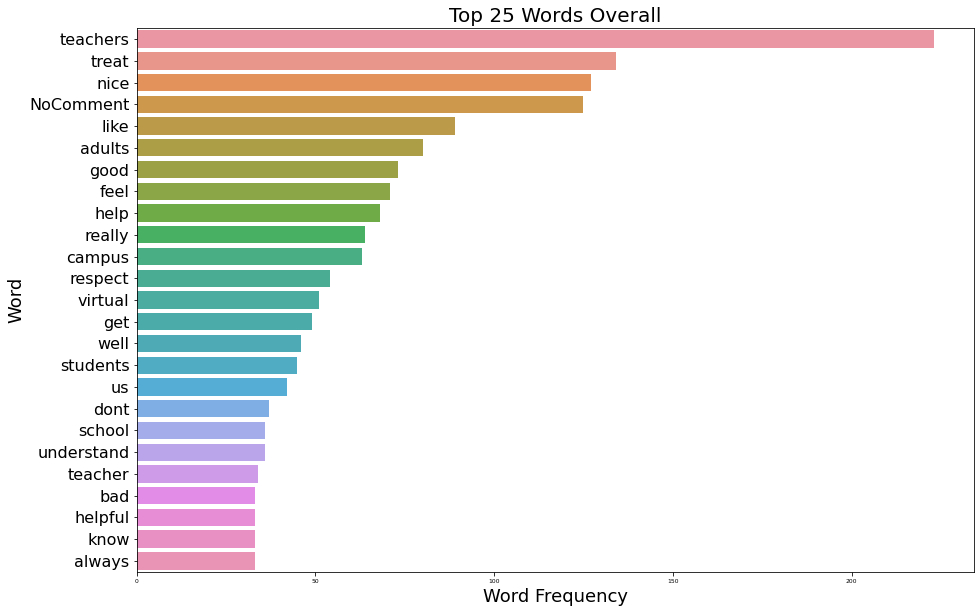

In [81]:
plt.figure(figsize=(15,10))
sns.barplot(y='Word', x='word frequency', data=Top25)
plt.ylabel('Word', fontsize=18)
plt.xlabel('Word Frequency', fontsize=18)
plt.yticks(fontsize=16)
plt.title("Top 25 Words Overall", fontsize= 20)
plt.show()

In [82]:
df.head()

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count,No_Punt,No_Stop,Final_Comment
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...,28,When we are talking to our peers they always i...,"[talking, peers, always, interrupt, us, say, t...","[talk, peer, always, interrupt, us, say, talk,..."
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...,17,there are maybe two aduts that are not over th...,"[maybe, two, aduts, top, hipocritical, everyth...","[maybe, two, aduts, top, hipocritical, everyth..."
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...,10,They do n't understand what most of us are goi...,"[understand, us, going, though]","[understand, us, go, though]"
3,10,Full,No,Yes,W,In Person,1.0,lonely,1,lonely,[lonely],[lonely]
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...,72,its terrible we walk in to to this teacher try...,"[terrible, walk, teacher, trying, shove, polit...","[terrible, walk, teacher, try, shove, politica..."


In [83]:
# Common from 9th grade
all_W =[]
for word in Comments_9['Final_Comment']:
    all_W.extend(word)
    
X= Counter(all_W)   
X

Counter({'talk': 16,
         'peer': 2,
         'always': 16,
         'interrupt': 1,
         'us': 12,
         'say': 5,
         'side': 1,
         'school': 10,
         'even': 5,
         'though': 4,
         'phone': 1,
         'maybe': 1,
         'two': 2,
         'aduts': 1,
         'top': 1,
         'hipocritical': 1,
         'everything': 2,
         'go': 5,
         'understand': 5,
         'many': 3,
         'teachers': 50,
         'give': 3,
         'lot': 5,
         'work': 4,
         'enough': 2,
         'time': 5,
         'complete': 3,
         'class': 6,
         'least': 1,
         'feel': 16,
         'like': 15,
         'wise': 1,
         'best': 4,
         'think': 4,
         'ideal': 1,
         'situation': 1,
         'learn': 4,
         'moment': 1,
         'regardless': 1,
         'nice': 39,
         'dont': 15,
         'much': 6,
         'NoComment': 33,
         'try': 8,
         'adults': 23,
         'ask': 8,
         '

In [84]:
Common_Words_9 = pd.DataFrame.from_dict(data=X, orient='index')
Common_Words_9

,0
talk,16
peer,2
always,16
interrupt,1
us,12
...,...
mostly,1
excellently,1
offer,1
mom,1


In [85]:
Top_Common_Words_9 = Common_Words_9.rename({0:'word frequency'}, axis='columns').sort_values(by=['word frequency'], ascending=False)

In [86]:
Top_Common_Words_9.head(25)

,word frequency
teachers,50
treat,42
nice,39
NoComment,33
help,25
adults,23
good,18
well,17
feel,16
talk,16


In [87]:
Top_Common_Words_9.reset_index(inplace=True)
Top_Common_Words = Top_Common_Words_9.rename(columns = {'index': "Word"})
Top25_9th= Top_Common_Words.head(25)
Top25_9th

,Word,word frequency
0,teachers,50
1,treat,42
2,nice,39
3,NoComment,33
4,help,25
5,adults,23
6,good,18
7,well,17
8,feel,16
9,talk,16


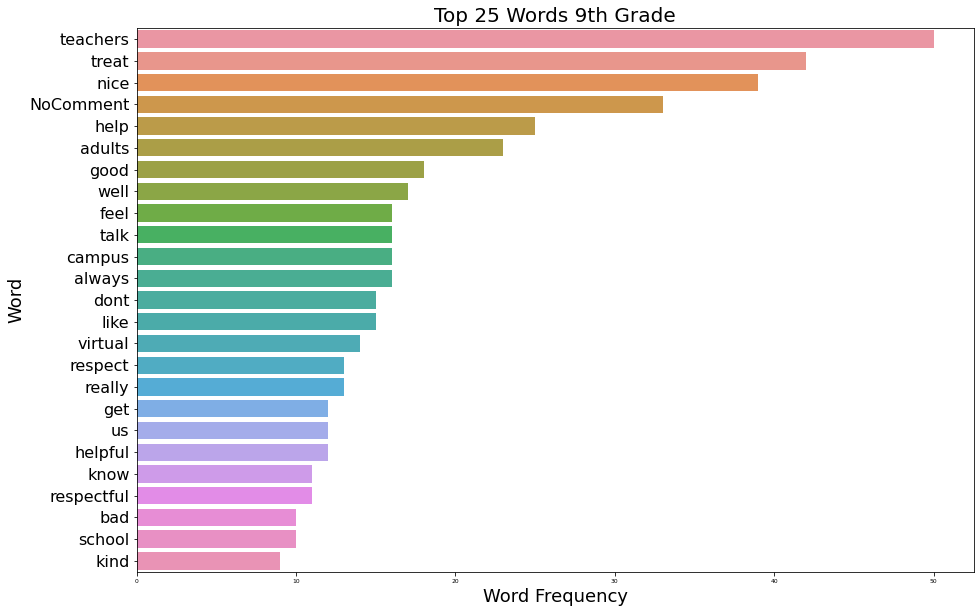

In [88]:
plt.figure(figsize=(15,10))
sns.barplot(y='Word', x='word frequency', data=Top25_9th)
plt.ylabel('Word', fontsize=18)
plt.xlabel('Word Frequency', fontsize=18)
plt.yticks(fontsize=16)
plt.title("Top 25 Words 9th Grade", fontsize= 20)
plt.show()

In [145]:
# Common from 10th grade
all_W =[]
for word in Comments_B['Final_Comment']:
    all_W.extend(word)
    
X= Counter(all_W)   
X

Counter({'adults': 7,
         'annoy': 1,
         'otherwise': 1,
         'fine': 1,
         'like': 7,
         'bad': 2,
         'anything': 2,
         'mainly': 1,
         'put': 1,
         'try': 2,
         'talk': 3,
         'dont': 3,
         'many': 2,
         'negative': 1,
         'experience': 1,
         'campus': 4,
         'really': 6,
         'interact': 1,
         'NoComment': 13,
         'teachers': 12,
         'pay': 2,
         'attention': 2,
         'students': 11,
         'need': 2,
         'performance': 1,
         'guidance': 1,
         'manage': 1,
         'person': 2,
         'mean': 2,
         'havent': 1,
         'do': 1,
         'piss': 1,
         'kind': 3,
         'also': 2,
         'helpful': 3,
         'never': 2,
         'problems': 3,
         'good': 5,
         'people': 2,
         'treat': 5,
         'feel': 5,
         'teacher': 4,
         'provide': 1,
         'reason': 2,
         'doand': 1,
         'say': 

In [146]:
Common_Words_B = pd.DataFrame.from_dict(data=X, orient='index')
Common_Words_B

,0
adults,7
annoy,1
otherwise,1
fine,1
like,7
...,...
nice,1
respectful,1
opinions,1
alot,1


In [147]:
Top_Common_Words_B = Common_Words_B.rename({0:'word frequency'}, axis='columns').sort_values(by=['word frequency'], ascending=False)

In [148]:
Top_Common_Words_B.head(25)

,word frequency
NoComment,13
teachers,12
students,11
adults,7
like,7
really,6
virtual,5
good,5
treat,5
feel,5


In [149]:
Top_Common_Words_B.reset_index(inplace=True)
Top_Common_Words = Top_Common_Words_B.rename(columns = {'index': "Word"})
Top25_B= Top_Common_Words.head(25)
Top25_B

,Word,word frequency
0,NoComment,13
1,teachers,12
2,students,11
3,adults,7
4,like,7
5,really,6
6,virtual,5
7,good,5
8,treat,5
9,feel,5


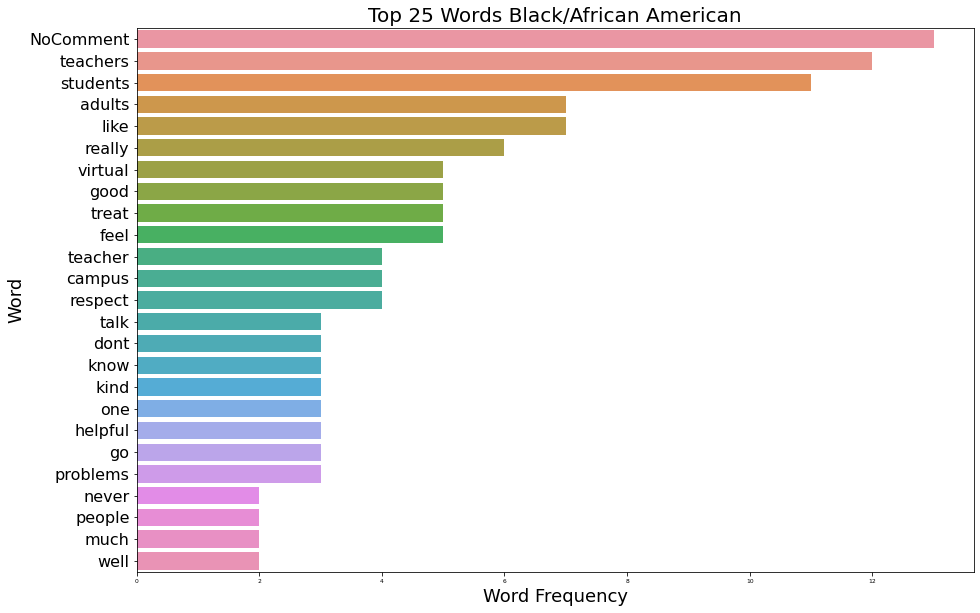

In [150]:
plt.figure(figsize=(15,10))
sns.barplot(y='Word', x='word frequency', data=Top25_B)
plt.ylabel('Word', fontsize=18)
plt.xlabel('Word Frequency', fontsize=18)
plt.yticks(fontsize=16)
plt.title("Top 25 Words Black/African American", fontsize= 20)
plt.show()

In [102]:
df.head()

,Grade,SES,504,Sped,Race,V_I,Rating,Comment,Word_Count,No_Punt,No_Stop,Final_Comment
0,9,Full,No,No,W,In Person,1.0,When we are talking to our peers they always i...,28,When we are talking to our peers they always i...,"[talking, peers, always, interrupt, us, say, t...","[talk, peer, always, interrupt, us, say, talk,..."
1,9,Full,No,No,W,In Person,1.0,there are maybe two aduts that are not over th...,17,there are maybe two aduts that are not over th...,"[maybe, two, aduts, top, hipocritical, everyth...","[maybe, two, aduts, top, hipocritical, everyth..."
2,9,Full,No,Yes,W,In Person,1.0,They don't understand what most of us are goin...,10,They do n't understand what most of us are goi...,"[understand, us, going, though]","[understand, us, go, though]"
3,10,Full,No,Yes,W,In Person,1.0,lonely,1,lonely,[lonely],[lonely]
4,10,Full,No,Yes,W,In Person,1.0,its terrible we walk in to __________ to this ...,72,its terrible we walk in to to this teacher try...,"[terrible, walk, teacher, trying, shove, polit...","[terrible, walk, teacher, try, shove, politica..."


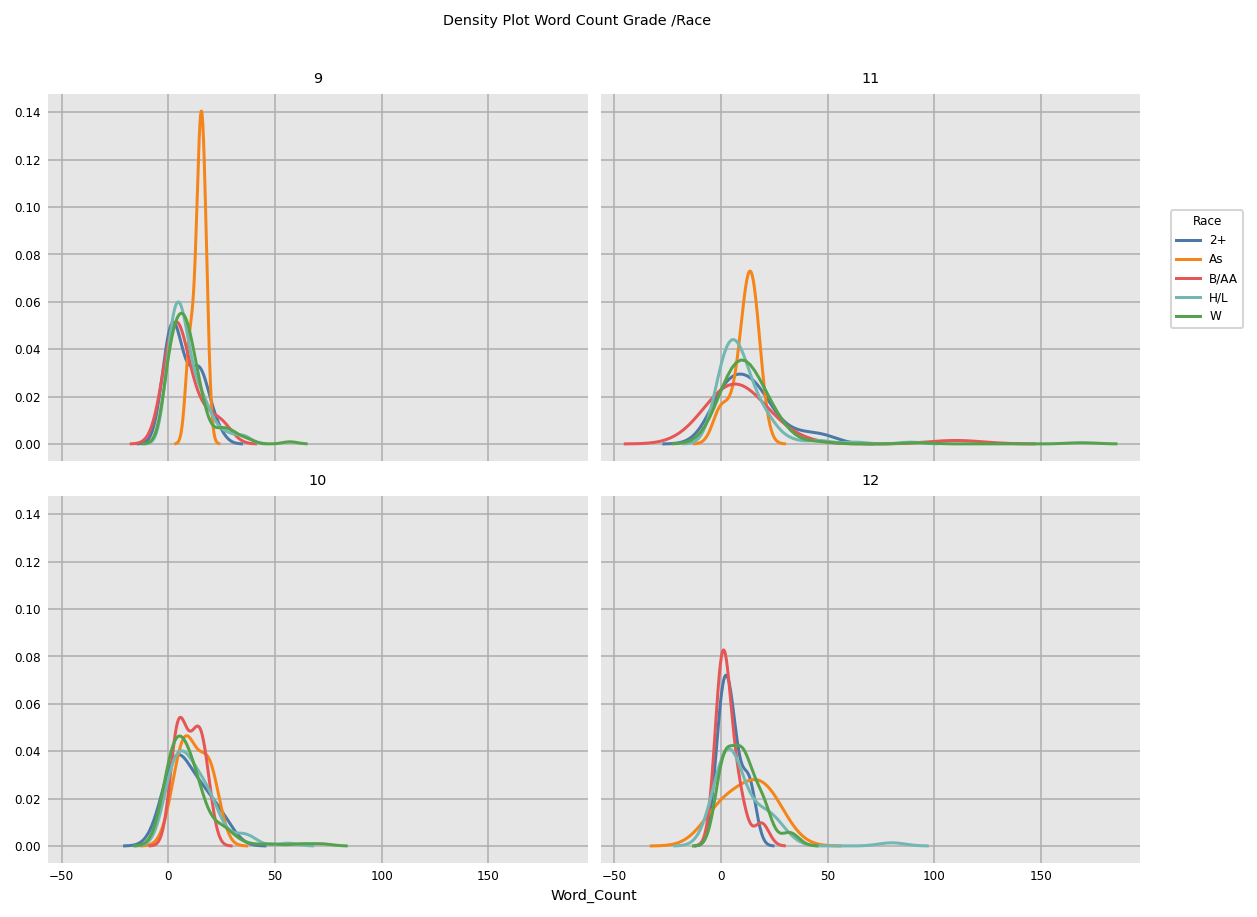

In [114]:
dxp.kde(x='Word_Count', data=df, split='Race', col='Grade', wrap=2, title="Density Plot Word Count Grade /Race")

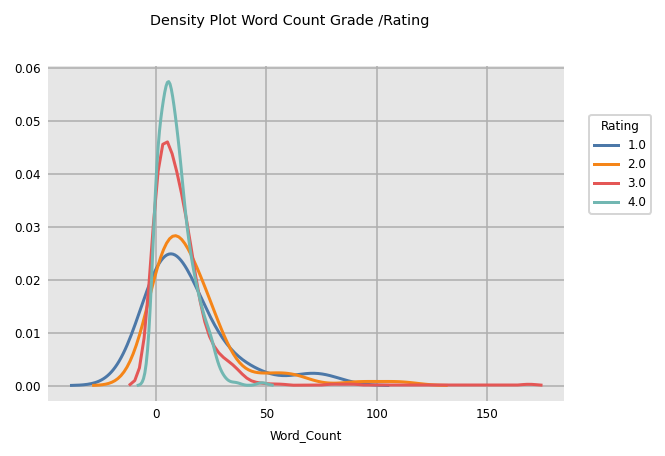

In [115]:
dxp.kde(x='Word_Count', data=df, split='Rating',  title="Density Plot Word Count Grade /Rating")

In [117]:
nada = df.Comment.value_counts()['NoComment']
nada

125

In [118]:
df["Race"].value_counts()

W       403
H/L     312
B/AA     54
2+       48
As       20
Name: Race, dtype: int64

In [131]:
df[df['Comment']=='NoComment'].groupby(['Race'])['Grade'].count().sort_index()

Race
2+      11
As       2
B/AA    13
H/L     42
W       57
Name: Grade, dtype: int64

In [136]:
data = {"Race": ['W', 'H/L', 'B/AA', '2+', 'As'], 'No_Comment':[57, 42, 13, 11,2 ], 'Total': [403, 312, 54, 48, 20],
       'Percent': [57/403*100, 42/312*100, 13/54*100, 11/48*100, 2/20*100]}
data = pd.DataFrame(data)
data

,Race,No_Comment,Total,Percent
0,W,57,403,14.143921
1,H/L,42,312,13.461538
2,B/AA,13,54,24.074074
3,2+,11,48,22.916667
4,As,2,20,10.000000


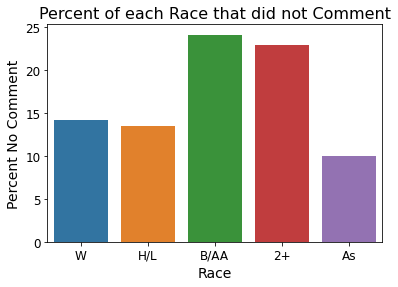

In [144]:
sns.barplot(x="Race", y="Percent", data=data)
plt.title('Percent of each Race that did not Comment', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Percent No Comment', fontsize=14)
plt.show()

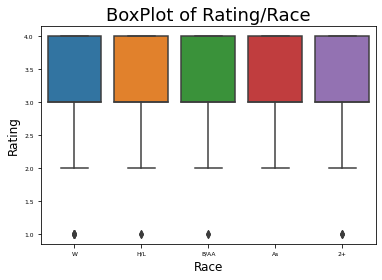

In [157]:
sns.boxplot(x='Race', y='Rating', data=df)
plt.ylabel('Rating',fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.title('BoxPlot of Rating/Race', fontsize=18)
plt.show()

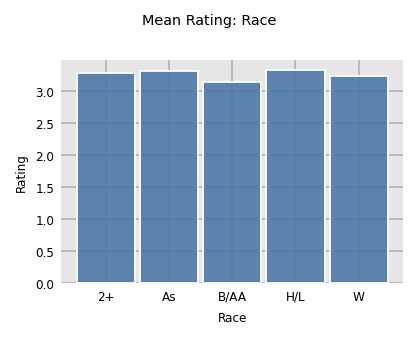

In [159]:
dxp.bar(x='Race', y='Rating', data=df, aggfunc='mean', title='Mean Rating: Race')

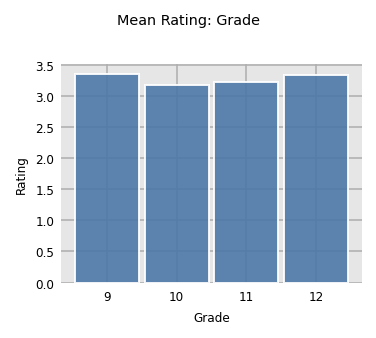

In [160]:
dxp.bar(x='Grade', y='Rating', data=df, aggfunc='mean', title='Mean Rating: Grade')

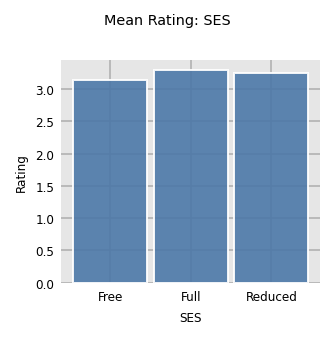

In [162]:
dxp.bar(x='SES', y='Rating', data=df, aggfunc='mean', title='Mean Rating: SES')

In [163]:
(df['Race']=='B').mean()

Grade           NaN
SES             NaN
504             NaN
Sped            NaN
Race            NaN
V_I             NaN
Rating          NaN
Comment         NaN
Word_Count      NaN
No_Punt         NaN
No_Stop         NaN
Final_Comment   NaN
dtype: float64